## Problem 3.1: SIS model with risk groups

Author: Emma Accorsi @emmaaccorsi

Date: 2018-10-01

Import libraries.

In [1]:
library(deSolve)
library(ggplot2)
library(reshape2)

Specify SIS model function.

In [2]:
sis_ode <- function(times,x,parms){
  with(as.list(c(parms,x)),{
    # ODEs
    SH<-nH-x[[1]] #Calculate SH as nH-IH
    SL<-(1-nH)-x[[2]] #Calculate SL as nL-IL
    dIH <-+(betaHH*IH+betaHL*IL)*SH-gamma*IH
    dIL <-+(betaLH*IH+betaLL*IL)*SL-gamma*IL
    
    der<-c(dIH,dIL)
    list(der)
  })
}

Specify parameter values and run SIS model

In [3]:
parms <- c(betaHH=10,betaHL=0.1,betaLH=0.1,betaLL=1,gamma=1,nH=0.2)
x <- c(IH=0.00001,IL=0.001)
times <-seq(0,15,1)
sis_out <- as.data.frame(lsoda(x,times,sis_ode,parms))

Create visualization with ggplot2

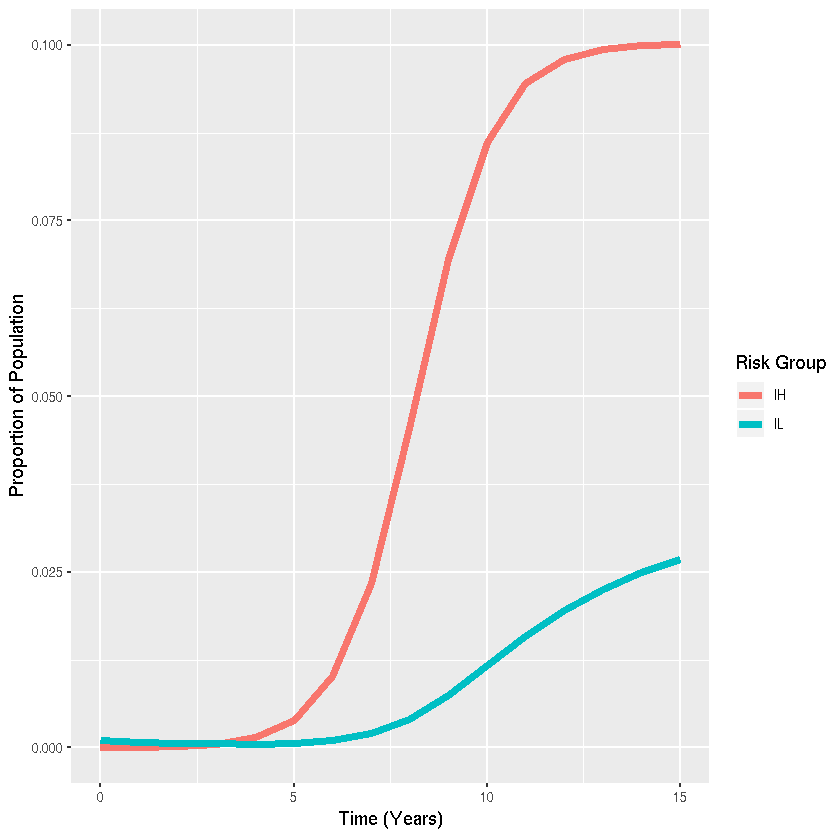

In [4]:
sis_out_long <- melt(sis_out,"time") #Collapse dataset from "wide" to "long" format for plotting
ggplot(sis_out_long,aes(x=time,y=value,colour=variable,group=variable))+
  # Add line
  geom_line(lwd=2)+
  #Add labels
  labs(x="Time (Years)",y="Proportion of Population",color="Risk Group")